MNIST shape: (70000, 784) (70000,)

Learned attributes:
theta_ shape (means): (10, 784)
var_ shape (variances): (10, 784)
class_count_ shape: (10,)

Test Accuracy: 55.16%


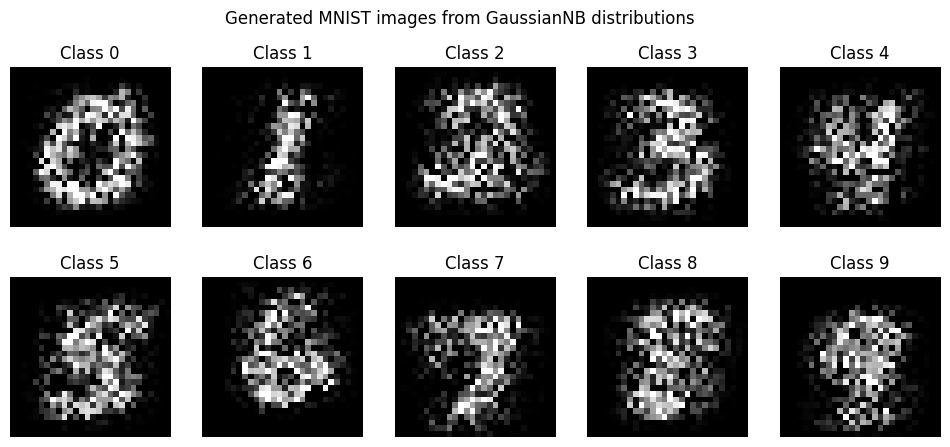

In [5]:
# %%
# ### Gaussian Naive Bayes on MNIST + Data Generation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.datasets import mnist


# %%
# --- Load MNIST ---
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)
print("MNIST shape:", X.shape, y.shape)

# Flattened already → 784 dims per sample

# %%
# --- Train / Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %%
# --- Train GaussianNB ---
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("\nLearned attributes:")
print("theta_ shape (means):", gnb.theta_.shape)
print("var_ shape (variances):", gnb.var_.shape)
print("class_count_ shape:", gnb.class_count_.shape)

# %%
# --- Evaluate ---
acc = gnb.score(X_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

# %%
# --- Generate New Images by Sampling ---
def generate_image(class_label):
    """Generate a sample given class label from learned distributions."""
    means = gnb.theta_[class_label]      # 784
    variances = gnb.var_[class_label]  # 784

    # sample from normal distribution
    sample = np.random.normal(loc=means, scale=np.sqrt(variances))

    # Clip to valid pixel range [0, 255] for display
    sample = np.clip(sample, 0, 255)
    return sample.reshape(28, 28)

# %%
# Visualize a few generated samples
num_samples = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Generated MNIST images from GaussianNB distributions")

for i, ax in enumerate(axes.flatten()):
    gen_img = generate_image(i)
    ax.imshow(gen_img, cmap='gray')
    ax.set_title(f"Class {i}")
    ax.axis('off')

plt.show()
